[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

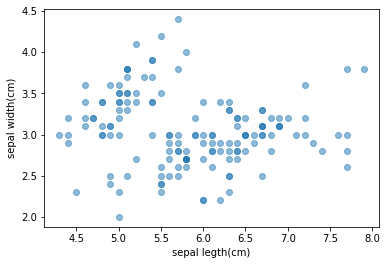

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
samples = iris.data
print(samples)

from matplotlib import pyplot as plt
x = samples[:, 0]
y = samples[:, 1]

plt.scatter(x,y,alpha=0.5)
plt.xlabel('sepal legth(cm)')
plt.ylabel('sepal width(cm)')
plt.show()

[(5.790007036373744, 2.722578400499879), (7.710876090713187, 2.9482125919610933), (5.879936924604447, 2.331049462698639)]


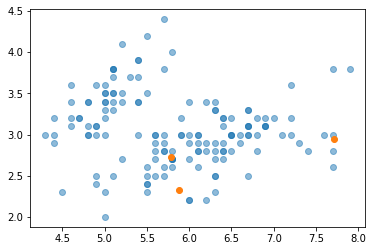

In [2]:
import numpy as np
k = 3
centroids_x = np.random.uniform(min(x), max(x), k)
centroids_y = np.random.uniform(min(y), max(y), k)
centroids = list(zip(centroids_x, centroids_y))
print(centroids)
plt.scatter(x, y, alpha=0.5)
plt.scatter(centroids_x, centroids_y)
plt.show()

In [3]:
# centroids에 가까운 데이터를 할당(가깝다라는 것을 정량화하기위해) 각 데이터를 백터로 간주하여 유클리드 거리 계산
def distance(a,b):
    return sum([(el_a - el_b)**2 for el_a, el_b in list(zip(a,b))]) **0.5

# 라벨스란 배열 생성해서 가장 가까운 index를 저장, 각 데이터 포인트별 그룹화 할 labels를 생성(0,1,2)
labels = np.zeros(len(samples))
sepal_length_width = np.array(list(zip(x,y)))

#각 데이터를 순회하면서 centroids 와의 거리를 측정
for i in range(len(samples)):
    distances = np.zeros(k) # 초기거리는 모두 0으로 초기화, 3개(k)요소 1차원 배열
    for j in range(k): # 3번 반복(가각의 x,y에 대해 세 중심과의 거리를 구해 distance[0][1][2]에 집어넣음)
        distances[j] = distance(sepal_length_width[i], centroids[j])
    cluster = np.argmin(distances) # np.argmin은 가장 작은 값의 index를 반환(세 중심중 어디에 가까운지)
    labels[i] = cluster # label에는 각각 x,y에 대해 세 중심중 어디에 속하느지에 대한 정보가 있음
    
print(labels)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 2. 0. 0. 0. 0. 0. 0. 2. 0. 2. 0. 0. 0. 0. 0. 2. 0. 0. 0.
 2. 0. 0. 0. 1. 0. 0. 0. 2. 2. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 2. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 2. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 2.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1.
 1. 0. 2. 0. 0. 0.]


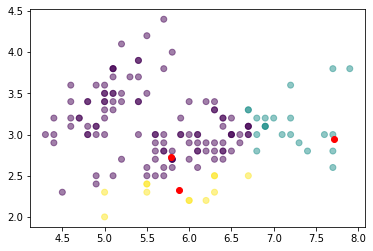

[(5.790007036373744, 2.722578400499879), (7.710876090713187, 2.9482125919610933), (5.879936924604447, 2.331049462698639)]


In [4]:
# 생성된 labels에는 1,2,0이 저장되어 어느 그룹에 속하는지 시각화함
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids_x, centroids_y, c='red')
plt.show()
print(centroids)

In [5]:

# Update Centroids 데이터를 잘 그룹화 할수 있도록 만들어야함. 그래서 일단 카피함
from copy import deepcopy
centroids_old = deepcopy(centroids)
# 각 그루별 데이터 평균계산 하여 x,y의 하나의 좌표를 계산! 이 좌표를 새로운 centroids로 지정
for i in range(k):
    # 각 그룹에 속한 데이터들만 골라 points에 저장, labels에 섞인값을 구분하여 저장, points는 각 그룹의 x,y 좌표를 가진 list
    points = [ sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i ]
    # points 의 각 feature, 즉 각 좌표의 평균지점을 centroid로 지정
    centroids[i] = np.mean(points, axis=0)

print(centroids)   
print(centroids_old)

[array([5.58706897, 3.12068966]), array([7.18636364, 3.12727273]), array([5.85833333, 2.31666667])]
[(5.790007036373744, 2.722578400499879), (7.710876090713187, 2.9482125919610933), (5.879936924604447, 2.331049462698639)]


In [6]:
# 필요한 모든 building blocks를 구현, 2~3단계를 반복하여 최적의 centorids를 찾는것이 목표
# error라는 배열 생성해서 새로운 centroids의 거리를 저장, 이 거리가 모두 0이 되면 최적에 수렵한 것으로 판단하여 반복을 종료

centroids_old = np.zeros(centroids.shape)
labels = np.zeros(len(samples))
error = np.zeros(k)

for i in range(k):
    error[i] = distance(centroids_old[i], centroids[i])
    
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1], c='red')  
plt.scatter(centroids_old[:,0], centroids_old[:,1], c='blue')
plt.show()

AttributeError: 'list' object has no attribute 'shape'

In [7]:
# 열의 데이터 중 조건과 맞는 데이터가 있으면 True 전혀 없으면 False
while(error.all() != 0):
    # 가까운 centroids에 데이터를 할당
    for i in range(len(samples)):
        distances = np.zeros(k)
        for j in range(k):
            distances[j] = distance(sepal_length_width[i], centroids[j])
    cluster = np.argmin(distances)
    labels[i] = cluster
    centroids_old = deepcopy(centroids)
    for i in range(k):
        points = [ sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i ]
        centroids[i] = np.mean(points, axis=0)

    for i in range(k):
        error[i] = distance(centroids_old[i], centroids[i])
print(centroids)

NameError: name 'error' is not defined

TypeError: list indices must be integers or slices, not tuple

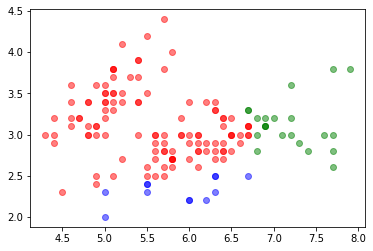

In [8]:
for i in range(k):
    colors = ['r','g','b']
    points = np.array([sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i ])
    plt.scatter(points[:,0], points[:,1], c=colors[i], alpha=0.5)
    
plt.scatter(centroids[:,0], centroids[:,1], marker='D', s=150)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()